# EDA

Plot spectrums to pdf to examine

In [2]:
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

In [3]:
def normalise(intensity):
    normalised_intensity = []
    #The intensity value of each peak is divided by the maximum intensity value, to normalise the data with the max at i = 1
    max_i = max(intensity)
    for value in intensity:
        normalised_intensity.append(value / max_i)
        
    return normalised_intensity

In [4]:
input_data_url = 'Data//Final CSV Data//'
input_files = sorted(listdir(input_data_url))
input_files = [file for file in input_files if file not in ['.DS_Store', 'demo_4.csv']]

### Write spectrums to file

This allows us to assess them for validity

In [5]:
def plotGraph(X,Y, file):
    fig = plt.figure()
    plt.scatter(X, Y)
    plt.title(file)
    return fig

<ipython-input-5-fd9858f3860a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


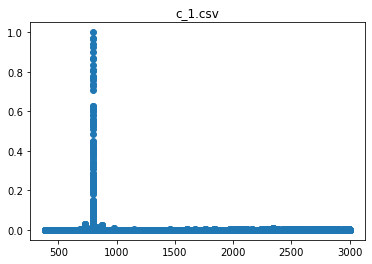

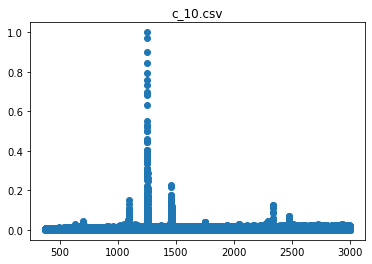

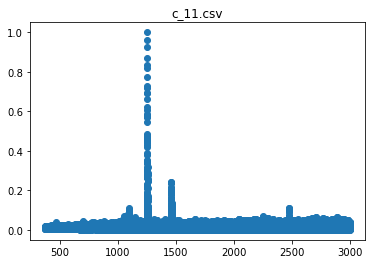

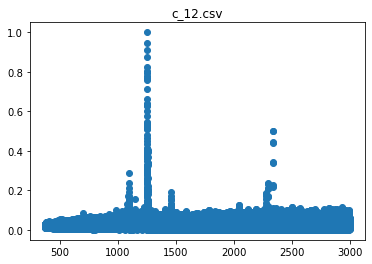

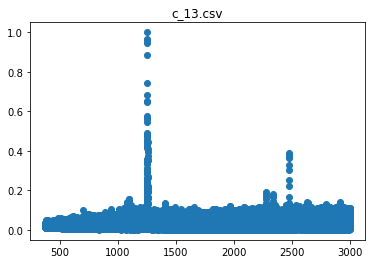

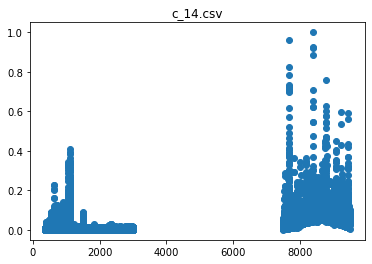

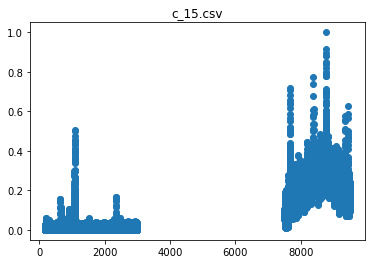

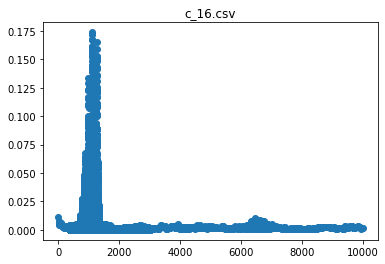

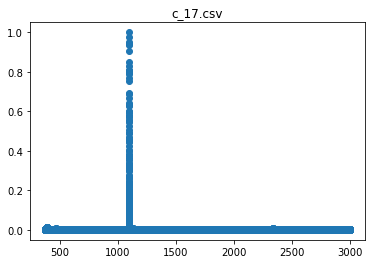

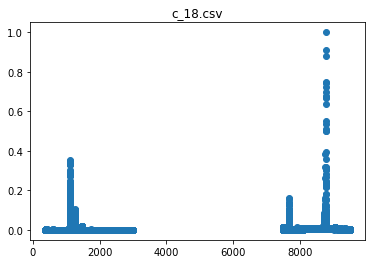

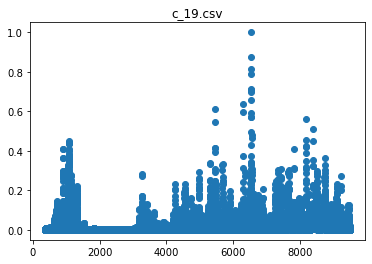

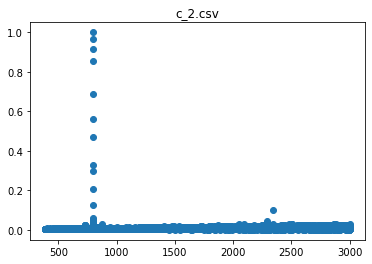

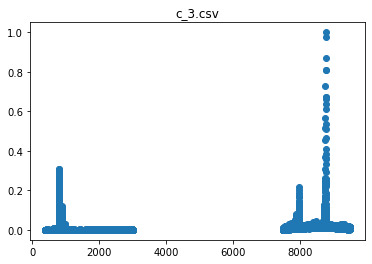

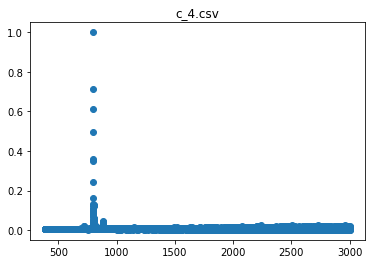

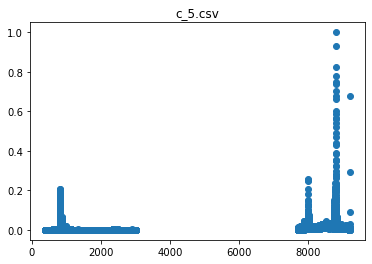

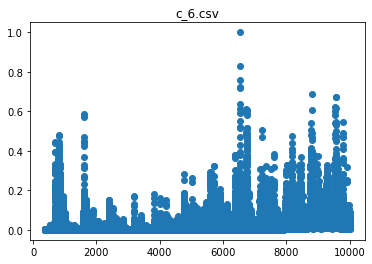

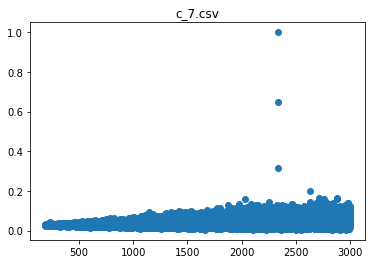

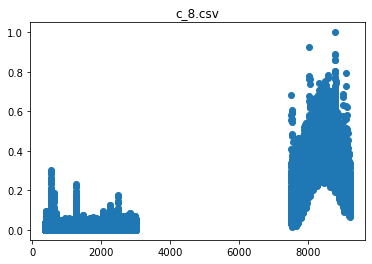

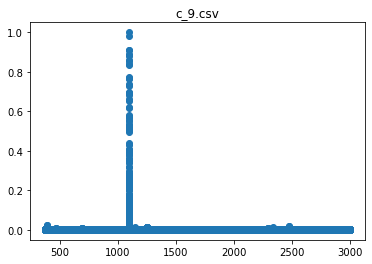

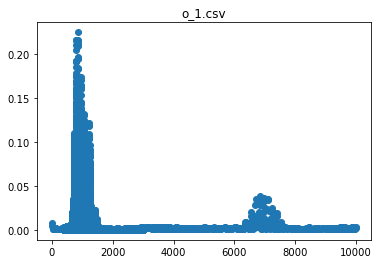

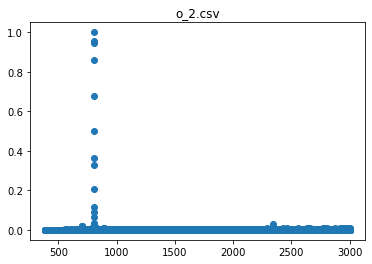

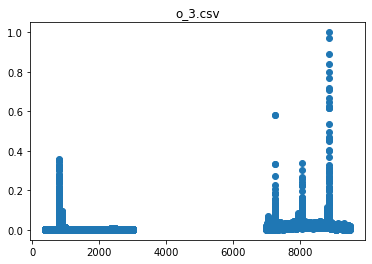

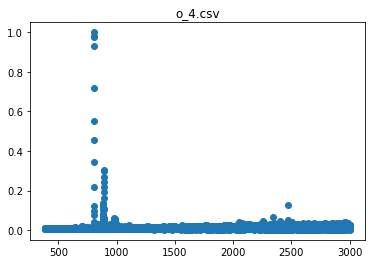

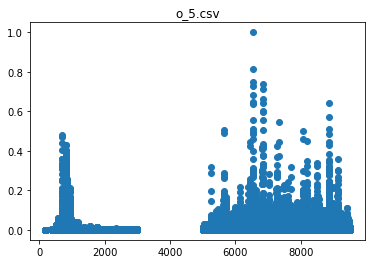

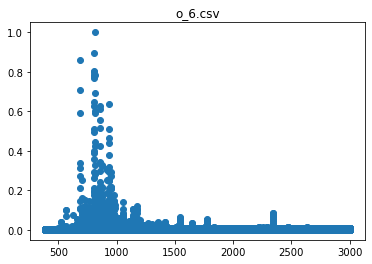

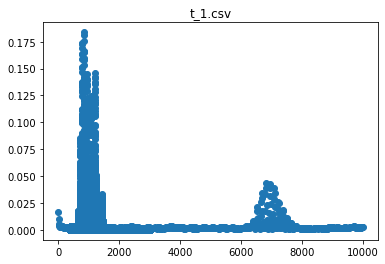

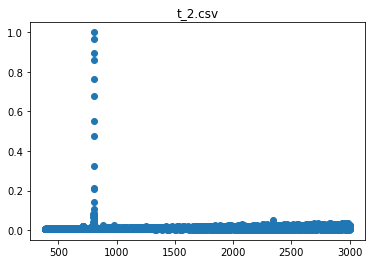

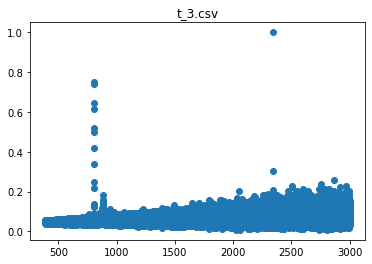

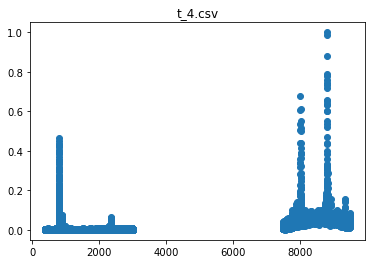

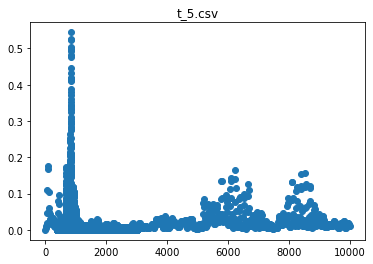

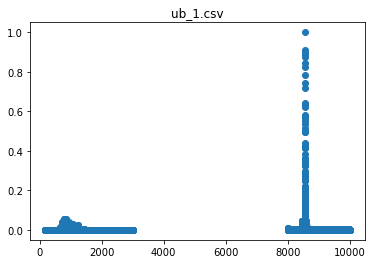

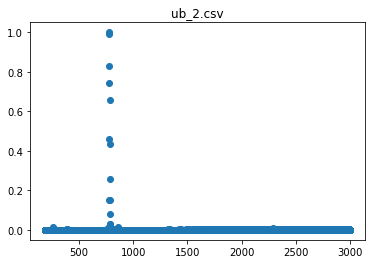

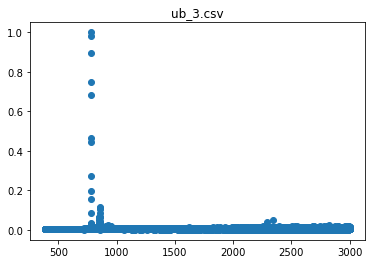

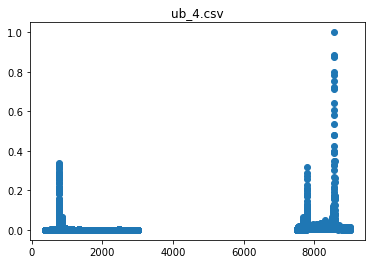

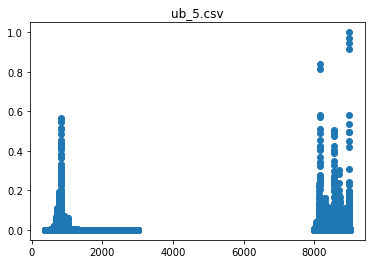

In [6]:
pp = PdfPages('Spectrums.pdf')
for file in input_files:
    
    df = pd.read_csv(input_data_url+file)
    #normalise intensity
    normalised_intensity = normalise(df['intensity'])
    df["normalised_intensity"] = normalised_intensity
    
    #filter out everything about m/z 10000
    filtered_df = df[df['m/z'] <= 10000]
    #plot
    plot = plotGraph(filtered_df['m/z'], filtered_df['normalised_intensity'], file)
    #save plot to pdf
    pp.savefig(plot)
    
#close pdf at end
pp.close()  